In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .master("yarn") \
        .appName("testing") \
        .config("spark.executor.instances", "3") \
        .config("spark.executor.memory","1g") \
        .config("spark.driver.memory","3g") \
        .config("spark.executor.cores",'1') \
        .config("spark.scheduler.mode","FIFO") \
        .getOrCreate()

In [3]:
from pyspark.sql import DataFrame
from pyspark.sql import *
from pyspark.ml import Pipeline
from pyspark.ml.classification import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Normalizer
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.tuning import *
from pyspark.ml.feature import Imputer
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import Word2Vec

In [4]:
import numpy as np
import pandas as pd
import scipy as sc
import time

In [5]:
timeCSV=[]
timePAR=[]
times=[]

In [6]:
start=time.time()
dCSV = spark.read.csv("Reviews.csv", header=True, inferSchema=True)
end=time.time()
firstReadCSV=end-start
print(firstReadCSV)
timeCSV.append(firstReadCSV)
times.append("First Read File")

10.145783424377441


In [7]:
start=time.time()
dPAR=spark.read.parquet("Reviews1.parquet")
end=time.time()
firstReadPAR=end-start
print(firstReadPAR)
timePAR.append(firstReadPAR)

0.5562658309936523


In [8]:
count=0
for x in range (0,10):
    start=time.time()
    dCSV = spark.read.csv("Reviews.csv", header=True, inferSchema=True)
    end=time.time()
    readCSV=end-start
    count=count+readCSV
readCSV=count/10;
print(readCSV)
timeCSV.append(readCSV)
times.append("Read File")

1.9041383266448975


In [9]:
count=0
for x in range (0,10):
    start=time.time()
    dPAR=spark.read.parquet("Reviews1.parquet")
    end=time.time()
    readPAR=end-start
    count=count+readPAR
readPAR=count/10;
print(readPAR)
timePAR.append(readPAR)

0.18687722682952881


In [10]:
count=0
for x in range (0,10):
    start=time.time()
    dCSV.count()
    end=time.time()
    countCSV=end-start
    count=count+countCSV
countCSV=count/10
print(countCSV)
timeCSV.append(countCSV)
times.append("Count")

1.8410429000854491


In [11]:
count=0
for x in range (0,10):
    start=time.time()
    dPAR.count()
    end=time.time()
    countPAR=end-start
    count=count+countPAR
countPAR=count/10
print(countPAR)
timePAR.append(countPAR)

0.36518867015838624


In [12]:
dCSV=dCSV.withColumn("Stars", col("Score").cast(IntegerType()))
dCSV=dCSV.withColumn("Likes", col("HelpfulnessNumerator").cast(IntegerType()))
dCSV=dCSV.withColumn("TotalHelp", col("HelpfulnessDenominator").cast(IntegerType()))
dCSV=dCSV.drop("Score","HelpfulnessNumerator","HelpfulnessDemoninator")
dPAR=dPAR.withColumn("Stars", col("Score").cast(IntegerType()))
dPAR=dPAR.withColumn("Likes", col("HelpfulnessNumerator").cast(IntegerType()))
dPAR=dPAR.withColumn("TotalHelp", col("HelpfulnessDenominator").cast(IntegerType()))
dPAR=dPAR.drop("Score","HelpfulnessNumerator","HelpfulnessDemoninator")

In [13]:
count=0
for x in range (0,10):
    start=time.time()
    dCSV.groupby("Id").avg("Stars").show()
    end=time.time()
    groupbyCSV=end-start
    count=count+groupbyCSV
groupbyCSV=count/10
print(groupbyCSV)
timeCSV.append(groupbyCSV)
times.append("Group By")

+------+----------+
|    Id|avg(Stars)|
+------+----------+
|189310|       5.0|
|189488|       5.0|
|189903|       5.0|
|190174|       4.0|
|190227|       3.0|
|190387|       5.0|
|191350|       3.0|
|191355|       5.0|
|191554|       5.0|
|191933|       5.0|
|192082|       5.0|
|192401|       4.0|
|192545|       5.0|
|192738|       5.0|
|192952|       5.0|
|192988|       1.0|
|193137|       5.0|
|193166|       5.0|
|193228|       4.0|
|193640|       3.0|
+------+----------+
only showing top 20 rows

+------+----------+
|    Id|avg(Stars)|
+------+----------+
|382485|       5.0|
|382614|       5.0|
|382774|       5.0|
|383675|       5.0|
|383876|       4.0|
|384113|       5.0|
|384638|       5.0|
|384647|       5.0|
|384788|       5.0|
|384871|       5.0|
|384959|       5.0|
|384994|       4.0|
|385152|       4.0|
|385313|       4.0|
|385424|       1.0|
|385528|       1.0|
|386272|       1.0|
|386382|       2.0|
|386599|       5.0|
|386689|       5.0|
+------+----------+
only showing t

In [14]:
count=0
for x in range (0,10):
    start=time.time()
    dPAR.groupby("Id").avg("Stars").show()
    end=time.time()
    groupbyPAR=end-start
    count=count+groupbyPAR
groupbyPAR=count/10
print(groupbyPAR)
timePAR.append(groupbyPAR)

+------+----------+
|    Id|avg(Stars)|
+------+----------+
|382485|       5.0|
|382614|       5.0|
|382774|       5.0|
|383675|       5.0|
|383876|       4.0|
|384113|       5.0|
|384638|       5.0|
|384647|       5.0|
|384788|       5.0|
|384871|       5.0|
|384959|       5.0|
|384994|       4.0|
|385152|       4.0|
|385313|       4.0|
|385424|       1.0|
|385528|       1.0|
|386272|       1.0|
|386382|       2.0|
|386599|       5.0|
|386689|       5.0|
+------+----------+
only showing top 20 rows

+----+----------+
|  Id|avg(Stars)|
+----+----------+
| 148|       5.0|
| 463|       5.0|
| 471|       4.0|
| 496|       5.0|
| 833|       1.0|
|1088|       1.0|
|1238|       4.0|
|1342|       4.0|
|1580|       5.0|
|1591|       5.0|
|1645|       5.0|
|1829|       5.0|
|1959|       2.0|
|2122|       5.0|
|2142|       3.0|
|2366|       4.0|
|2659|       5.0|
|2866|       5.0|
|3175|       5.0|
|3749|       5.0|
+----+----------+
only showing top 20 rows

+----+----------+
|  Id|avg(Stars)|


In [15]:
count=0
for x in range (0,10):
    start=time.time()
    dCSV.groupby("Likes").count().show()
    end=time.time()
    groupbyCSV1=end-start
    count=count+groupbyCSV1
groupbyCSV1=count/10
print(groupbyCSV1)
timeCSV.append(groupbyCSV1)
times.append("groupby/count")

+-----+-----+
|Likes|count|
+-----+-----+
|  148|    2|
|   31|  160|
|  137|    8|
|   85|    7|
|  808|    1|
|  580|    1|
|   65|   25|
|   53|   33|
|  133|    1|
|  472|   10|
|   78|   10|
|  321|    1|
|  155|    1|
|  108|    2|
|   34|   85|
|  193|    1|
|  115|    6|
|  126|    1|
|  101|    2|
|   81|    6|
+-----+-----+
only showing top 20 rows

+-----+-----+
|Likes|count|
+-----+-----+
|  148|    2|
|   31|  160|
|  137|    8|
|   85|    7|
|  808|    1|
|  580|    1|
|   65|   25|
|   53|   33|
|  133|    1|
|  472|   10|
|   78|   10|
|  321|    1|
|  155|    1|
|  108|    2|
|   34|   85|
|  193|    1|
|  126|    1|
|  115|    6|
|  101|    2|
|   81|    6|
+-----+-----+
only showing top 20 rows

+-----+-----+
|Likes|count|
+-----+-----+
|  148|    2|
|   31|  160|
|   85|    7|
|  580|    1|
|  137|    8|
|  808|    1|
|   65|   25|
|   53|   33|
|  133|    1|
|  472|   10|
|   78|   10|
|  321|    1|
|  155|    1|
|  108|    2|
|   34|   85|
|  193|    1|
|  115|   

In [16]:
count=0
for x in range (0,10):
    start=time.time()
    dPAR.groupby("Likes").count().show()
    end=time.time()
    groupbyPAR1=end-start
    count=count+groupbyPAR1
groupbyPAR1=count/10
print(groupbyPAR1)
timePAR.append(groupbyPAR1)

+-----+-----+
|Likes|count|
+-----+-----+
|  148|    2|
|   31|  160|
|  137|    8|
|   85|    7|
|  580|    1|
|  808|    1|
|   65|   25|
|   53|   33|
|  133|    1|
|  472|   10|
|   78|   10|
|  321|    1|
|  155|    1|
|  108|    2|
|   34|   85|
|  193|    1|
|  115|    6|
|  101|    2|
|  126|    1|
|   81|    6|
+-----+-----+
only showing top 20 rows

+-----+-----+
|Likes|count|
+-----+-----+
|  148|    2|
|   31|  160|
|   85|    7|
|  580|    1|
|  137|    8|
|  808|    1|
|   65|   25|
|   53|   33|
|  472|   10|
|  133|    1|
|   78|   10|
|  321|    1|
|  155|    1|
|  108|    2|
|   34|   85|
|  193|    1|
|  126|    1|
|  115|    6|
|  101|    2|
|   81|    6|
+-----+-----+
only showing top 20 rows

+-----+-----+
|Likes|count|
+-----+-----+
|  148|    2|
|   31|  160|
|  137|    8|
|   85|    7|
|  808|    1|
|  580|    1|
|   65|   25|
|   53|   33|
|  472|   10|
|  133|    1|
|   78|   10|
|  321|    1|
|  155|    1|
|  108|    2|
|   34|   85|
|  193|    1|
|  115|   

In [17]:
count=0
for x in range (0,10):
    start=time.time()
    dCSV.take(100000)
    end=time.time()
    takeCSV=end-start
    count=count+takeCSV
takeCSV=count/10
print(takeCSV)
timeCSV.append(takeCSV)
times.append("take")

2.161705732345581


In [18]:
count=0
for x in range (0,10):
    start=time.time()
    dPAR.take(100000)
    end=time.time()
    takePAR=end-start
    count=count+takePAR
takePAR=count/10
print(takePAR)
timePAR.append(takePAR)

1.9266144514083863


In [19]:
tokenizer = Tokenizer(inputCol="Summary", outputCol="words")
wordsData = tokenizer.transform(dCSV)
dCSV = wordsData
tokenizer2 = Tokenizer(inputCol="Text", outputCol="wordsText")
textData = tokenizer2.transform(dCSV)
dCSV = textData

In [20]:
hashingTF = HashingTF(inputCol="words", outputCol="rawSum")
dCSV = hashingTF.transform(dCSV)
hashingTF2 = HashingTF(inputCol="wordsText", outputCol="rawWords")
featurizedData = hashingTF2.transform(dCSV)
idf = IDF(inputCol="rawWords", outputCol="featuresText")

In [21]:
count=0
for x in range (0,5):
    start=time.time()
    idfModel = idf.fit(featurizedData)
    end=time.time()
    featureCSV=end-start
    count=count+featureCSV
featureCSV=count/5
print(featureCSV)
timeCSV.append(featureCSV)
times.append("featurize text")

18.263694620132448


In [22]:
tokenizer = Tokenizer(inputCol="Summary", outputCol="words")
wordsData = tokenizer.transform(dPAR)
dPAR = wordsData
tokenizer2 = Tokenizer(inputCol="Text", outputCol="wordsText")
textData = tokenizer2.transform(dPAR)
dPAR = textData

In [23]:
hashingTF = HashingTF(inputCol="words", outputCol="rawSum")
dPAR = hashingTF.transform(dPAR)
hashingTF2 = HashingTF(inputCol="wordsText", outputCol="rawWords")
featurizedData = hashingTF2.transform(dPAR)
idf = IDF(inputCol="rawWords", outputCol="featuresText")

In [24]:
count=0
for x in range (0,5):
    start=time.time()
    idfModel = idf.fit(featurizedData)
    end=time.time()
    featurePAR=end-start
    count=count+featurePAR
featurePAR=count/5
print(featurePAR)
timePAR.append(featurePAR)

16.212068033218383


In [25]:
d={'Test':times,'CSV':timeCSV,'Parquet':timePAR}
df=pd.DataFrame(data=d)

In [26]:
df

,CSV,Parquet,Test
0,10.145783,0.556266,First Read File
1,1.904138,0.186877,Read File
2,1.841043,0.365189,Count
3,2.067707,0.519617,Group By
4,2.078975,0.397051,groupby/count
5,2.161706,1.926614,take
6,18.263695,16.212068,featurize text


In [32]:
diffTime=df['CSV']/df['Parquet']
totalTime=df['Parquet']+df['CSV']

In [28]:
import matplotlib.pyplot as plt

/home/ethan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


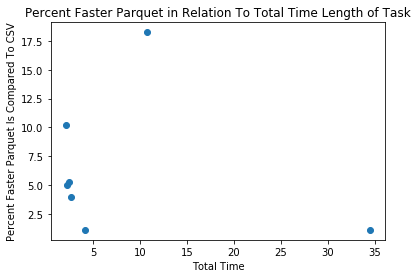

In [34]:
fig = plt.figure()
plt.scatter(totalTime,diffTime)
plt.title('Percent Faster Parquet in Relation To Total Time Length of Task')
plt.xlabel('Total Time')
plt.ylabel('Percent Faster Parquet Is Compared To CSV')
plt.show(fig)

The time difference showing how much in percent faster Parquet is compared to CSV doesn't seem to follow a noticable pattern. More research is needed. 

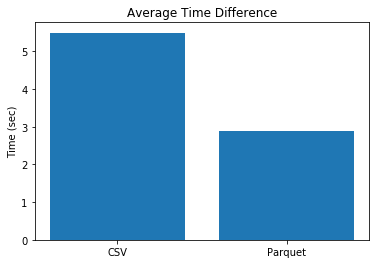

In [36]:
plt.title('Average Time Difference')
bar1 = (df['CSV']).mean()
bar2 = (df['Parquet']).mean()
plt.bar([0,1],[bar1,bar2],align='center')
plt.xticks([0,1],['CSV','Parquet'])
plt.ylabel('Time (sec)')
plt.savefig('bargraph.png',bbox_inches='tight')
plt.show()

Overall it seems that parquet is twice as fast as CSV, however, some of the tests may have outside factors influencing them. There are some tasks where parquet is much faster than just twice as fast.

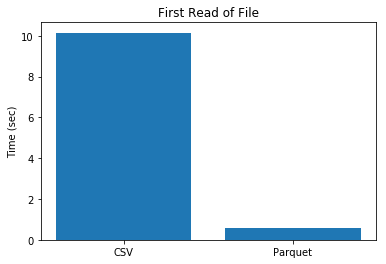

In [39]:
plt.title('First Read of File')
bar1 = (df.iloc[0]['CSV'])
bar2 = (df.iloc[0]['Parquet'])
plt.bar([0,1],[bar1,bar2],align='center')
plt.xticks([0,1],['CSV','Parquet'])
plt.ylabel('Time (sec)')
plt.savefig('bargraph.png',bbox_inches='tight')
plt.show()

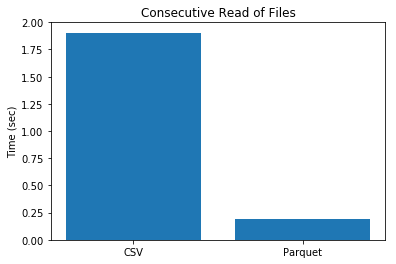

In [40]:
plt.title('Consecutive Read of Files')
bar1 = (df.iloc[1]['CSV'])
bar2 = (df.iloc[1]['Parquet'])
plt.bar([0,1],[bar1,bar2],align='center')
plt.xticks([0,1],['CSV','Parquet'])
plt.ylabel('Time (sec)')
plt.savefig('bargraph.png',bbox_inches='tight')
plt.show()

For reading files, the first read is much slower than the second for both CSV and Parquet. Parquet is much faster during the first read. It is over 18x faster. During the consecutive reads Parquet is 10x faster

In [46]:
df.iloc[0]['CSV']/df.iloc[0]['Parquet']

18.239091562129794

In [47]:
df.iloc[1]['CSV']/df.iloc[1]['Parquet']

10.189247555465228